# $B_c$ LCSR: $D$-mass prediction

In [1]:
import eos
import numpy as np

import os
import time
def build_time():
    return "eos built at " + time.ctime(os.path.getmtime(eos.__file__))

print(build_time())

eos built at Sat Feb 13 19:30:19 2021


## Interesting case: $B_c \to D$ LCSRs

In [8]:
def set_parameters(params, dict):
    for key, value in dict.items():
        eos.Parameters.set(parameters, key, value)
        

model_parameters = {"B_c::delta_N": 0.52, "B_c::omega_1_plus": 1.71, 'B_c->D::M^2@B-LCSR': 4.5}
model_parameters.update({'B_c->D::s_0^+/-,0@B-LCSR': 6, 'B_c->D::s_0^+,0@B-LCSR': 6})

runs = (
    {
        'name': 'positive solution',
        'params' : model_parameters,
        'options': 'solution=+'
    },
    {
        'name': 'negative solution',
        'params' : model_parameters,
        'options': 'solution=-'
    },
)

parameters = eos.Parameters.Defaults()
kinematics = eos.Kinematics(q2=-15)

for run in runs:
    print('>>> ', run['name'])
    set_parameters(parameters, run['params'])
    obs = (
        eos.Observable.make('B_c->D::f_+[s^1/s^0](q2);'+run['options'], parameters, kinematics, eos.Options()),
        eos.Observable.make('B_c->D::f_0[s^1/s^0](q2);'+run['options'], parameters, kinematics, eos.Options()),
        eos.Observable.make('B_c->D*::f_0[s^1/s^0](q2);'+run['options'], parameters, kinematics, eos.Options()),
    )
    display(*obs)

>>>  positive solution


B_c->D::f_+[s^1/s^0](q2),(eos.Observable)
current value,19.64


B_c->D::f_0[s^1/s^0](q2),(eos.Observable)
current value,2.966


None

>>>  negative solution


B_c->D::f_+[s^1/s^0](q2),(eos.Observable)
current value,-6.579


B_c->D::f_0[s^1/s^0](q2),(eos.Observable)
current value,8.517


None

## Mass predictor and $\omega_0$ -- model test

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


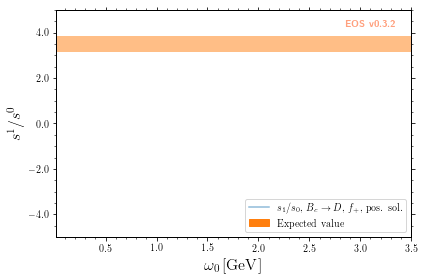

eos built at Sat Feb 13 19:30:19 2021


In [3]:
res = 1.869**2
res_err = 10 / 100 * res

model_parameters = {
    "B_c::delta_N": 0.52, "B_c::omega_1_plus": 1.71, 
    'B_c->D::M^2@B-LCSR': 4.5,
    'B_c->D::s_0^+,0@B-LCSR': 6.0
}

x_range = [0.01, 3.5]
plot_args = {
    'plot': {
        'x': { 'label': r'$\omega_0$', 'unit': r'$\textnormal{GeV}$', 'range': x_range, 'format': '${x:.1f}$'},
        'y': { 'label': r'$s^1/s^0$', 'range': [-5,  5] },
        'legend': { 'location': 'lower right' }
    },
    'contents': [
        {
            'label': r'$s_1/s_0$, $B_c\to D$, $f_+$, pos. sol.',
            'type': 'observable',
            'observable': 'B_c->D::f_+[s^1/s^0](q2);solution=+',
            'kinematics': {'q2': -5},
            'parameter': 'B_c::omega_1_plus',
            'parameters': model_parameters,
            'range': x_range,
        },
#         {
#             'label': r'$s_1/s_0$, $B_c\to D$, $f_0$, pos. sol.',
#             'type': 'observable',
#             'observable': 'B_c->D::f_0[s^1/s^0](q2);solution=+',
#             'kinematics': {'q2': 0},
#             'parameter': 'B_c::omega_0',
#             'parameters': model_parameters,
#             'range': x_range,
#         },
        {
            'type': 'band',
            'x': x_range,
            'y': [res - res_err, res + res_err],
            'label': 'Expected value',
        }
    ]
}
eos.plot.Plotter(plot_args).plot()
print(build_time())

### $q^2$ dependence

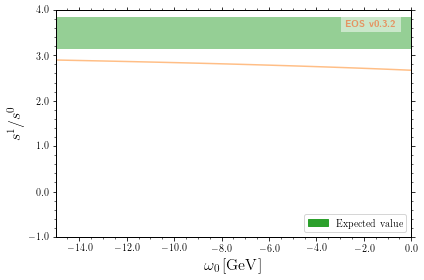

eos built at Sat Feb 13 19:30:19 2021


In [4]:
res = 1.869**2
res_err = 10 / 100 * res

x_range = [-15, 0]
plot_args = {
    'plot': {
        'x': { 'label': r'$\omega_0$', 'unit': r'$\textnormal{GeV}$', 'range': x_range, 'format': '${x:.1f}$'},
        'y': { 'label': r'$s^1/s^0$', 'range': [-1,  4] },
        'legend': { 'location': 'lower right' }
    },
    'contents': [
        {
            'type': 'observable',
            'observable': 'B_c->D::f_+[s^1/s^0](q2);3pt=off,2pt=tw2+3',
            'kinematic': 'q2',
            'range': x_range,
            'parameters': model_parameters,
        },
        {
            'type': 'observable',
            'observable': 'B_c->D::f_0[s^1/s^0](q2);3pt=off,2pt=tw2+3',
            'kinematic': 'q2',
            'range': x_range,
            'parameters': model_parameters,
        },
        {
            'type': 'band',
            'x': x_range,
            'y': [res - res_err, res + res_err],
            'label': 'Expected value',
        }
    ]
}
eos.plot.Plotter(plot_args).plot()
print(build_time())

### Threshold parameter?

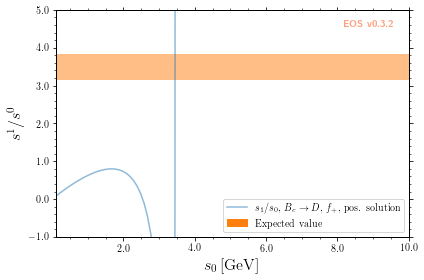

In [5]:
res = 1.869**2
res_err = 10 / 100 * res

temp_params = model_parameters
temp_params.update({'B_c::omega_1_plus': 2.0})

x_range = [0.1, 10]
plot_args = {
    'plot': {
        'x': { 'label': r'$s_0$', 'unit': r'$\textnormal{GeV}$', 'range': x_range, 'format': '${x:.1f}$'},
        'y': { 'label': r'$s^1/s^0$', 'range': [-1,  5] },
        'legend': { 'location': 'lower right' }
    },
    'contents': [
        {
            'label': r'$s_1/s_0$, $B_c\to D$, $f_+$, pos. solution',
            'type': 'observable',
            'observable': 'B_c->D::f_+[s^1/s^0](q2);solution=+',
            'kinematics': {'q2': 0},
            'parameter': 'B_c->D::s_0^+,0@B-LCSR',
            'parameters': temp_params,
            'range': x_range,
        },
        {
            'type': 'band',
            'x': x_range,
            'y': [res - res_err, res + res_err],
            'label': 'Expected value',
        }
    ]
}
eos.plot.Plotter(plot_args).plot()

#### Observe:
 * $f_+$: $\omega_0 \overset{!}{>} 1.8$

### Borel parameter?

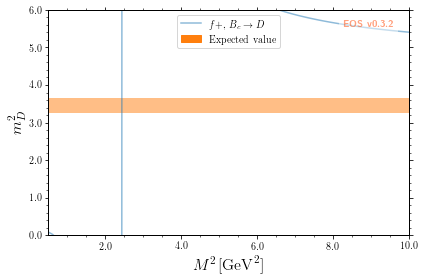

In [6]:
x_range = [0.5, 10]
plot_args = {
    'plot': {
        'x': { 'label': r'$M^2$', 'unit': r'$\textnormal{GeV}^2$', 'range': x_range},
        'y': { 'label': r'$m_D^2$', 'range': [0,  6] },
        'legend': { 'location': 'upper center' }
    },
    'contents': [
        {
            'label': r'$f+$, $B_c\to D$',
            'type': 'observable',
            'observable': 'B_c->D::f_+[s^1/s^0](q2);solution=+',
            'parameter': 'B_c->D::M^2@B-LCSR',
            'kinematics': {'q2': 0},
#             'parameters': model_parameters,
            'range': x_range,
        },
        {
            'type': 'band',
            'x': x_range,
            'y': [3.25, 3.65],
            'label': 'Expected value'
        }
    ]
}
eos.plot.Plotter(plot_args).plot()

## Statistical analysis

* **make s_0 independent!**
* f_+ and f_0 mass pred for likelihood
* prior: N0 = 1.75+0.5, omega_0 = 1.65GeV+-200MeV, Borel: M2=4.5+-1.5GeV2, s0: 6+-3GeV^2
* q2 = -5, 0, 5GeV^2

In [7]:
obss ={
    'B_c->D::f_+[s^1/s^0](q2);solution=+',
#     'B_c->D::f_0[s^1/s^0](q2);solution=+',
}

res = 1.869**2
res_err = 10 / 100 * res

manual_constraints = {}
for obs in obss:
    for q2 in [-10.0, -7.5, -5.0, -2.5, -0.0]:
        name = (
            obs.split(";")[0][:-4]+"@"+
            str(q2).replace('.', '-')+"GeV2"
        )
        constr = {
            name: {
                'observable': obs,
                'kinematics': {'q2': q2},
                'mean': res,
                'sigma-stat': {'hi': 0, 'lo': 0},
                'sigma-sys': {'hi': res_err, 'lo': res_err},
                'dof': 1,
                'type': 'Gaussian',
                'options': {}
                }
            }
        manual_constraints.update(constr)

analysis_args = {
    'likelihood': [],
    'manual_constraints': manual_constraints,
    'priors': [
        { 'parameter': 'B_c->D::M^2@B-LCSR',       'min':  3.0,   'max': 8.0,       'type': 'uniform'},
        { 'parameter': 'B_c->D::s_0^+,0@B-LCSR',   'min':  2,     'max': 12,        'type': 'uniform'},
#         { 'parameter': 'B_c->D::s_0^+/-,0@B-LCSR', 'min':  2,     'max': 12,        'type': 'uniform'},
        # gaussian: central, sigma
        { 'parameter': 'B_c::omega_1_plus',        'min':  0.8,   'max': 2.7,       'type': 'gaussian',
          'central': 1.71, 'sigma':  0.3},
        { 'parameter': 'B_c::delta_N',             'min':  0.0,   'max': 1.2,       'type': 'gaussian',
          'central': 0.52, 'sigma': 0.2},
    ],
}

analysis = eos.Analysis(**analysis_args)

# analysis.sample(preruns = 10, pre_N = 200, N = 1000, stride = 1)
analysis.sample(preruns = 10, pre_N = 300, N = 1000, stride = 1)

bfp = analysis.optimize()
display(bfp)
display(analysis.goodness_of_fit())

100%|██████████| 100/100 [00:06<00:00, 15.68it/s]


parameter,value
B_c->D::M^2@B-LCSR,8.0000
"B_c->D::s_0^+,0@B-LCSR",3.6264
B_c::omega_1_plus,2.7000
B_c::delta_N,1.1832


[ ] Adapte the code for B_c->D*

[ ] Produce series of analysis including a single ff for the following:
    [ ] f_+, V (D* VFF), A1, opt. f_+-, A12
    [ ] Float threshold and Borel param. uniformly, same Gaussian for oemga_1_plus and delta_N

In [ ]:
obss ={
    'B_c->D::f_+[s^1/s^0](q2);solution=+',
#     'B_c->D::f_0[s^1/s^0](q2);solution=+',
}

res = 1.869**2
res_err = 10 / 100 * res

manual_constraints = {}
for obs in obss:
    for q2 in [-10.0, -7.5, -5.0, -2.5, -0.0]:
        name = (
            obs.split(";")[0][:-4]+"@"+
            str(q2).replace('.', '-')+"GeV2"
        )
        constr = {
            name: {
                'observable': obs,
                'kinematics': {'q2': q2},
                'mean': res,
                'sigma-stat': {'hi': 0, 'lo': 0},
                'sigma-sys': {'hi': res_err, 'lo': res_err},
                'dof': 1,
                'type': 'Gaussian',
                'options': {}
                }
            }
        manual_constraints.update(constr)

analysis_args = {
    'likelihood': [],
    'manual_constraints': manual_constraints,
    'priors': [
        { 'parameter': 'B_c->D::M^2@B-LCSR',       'min':  3.0,   'max': 8.0,       'type': 'uniform'},
        { 'parameter': 'B_c->D::s_0^+,0@B-LCSR',   'min':  2,     'max': 12,        'type': 'uniform'},
#         { 'parameter': 'B_c->D::s_0^+/-,0@B-LCSR', 'min':  2,     'max': 12,        'type': 'uniform'},
        # gaussian: central, sigma
        { 'parameter': 'B_c::omega_1_plus',        'min':  0.8,   'max': 2.7,       'type': 'gaussian',
          'central': 1.71, 'sigma':  0.3},
        { 'parameter': 'B_c::delta_N',             'min':  0.0,   'max': 1.2,       'type': 'gaussian',
          'central': 0.52, 'sigma': 0.2},
    ],
}

analysis = eos.Analysis(**analysis_args)

# analysis.sample(preruns = 10, pre_N = 200, N = 1000, stride = 1)
analysis.sample(preruns = 10, pre_N = 300, N = 1000, stride = 1)

bfp = analysis.optimize()
display(bfp)
display(analysis.goodness_of_fit())